In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,70.0,4.0,NaN,322.0,0.0,2.0,NaN,0.0,2.4,2.0,3.0,NaN
1,0.0,NaN,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,NaN,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,NaN,NaN,141.0,0.0,NaN,1.0,0.0,7.0
3,NaN,64.0,4.0,128.0,263.0,NaN,0.0,NaN,1.0,0.2,NaN,1.0,NaN
4,NaN,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,NaN,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,NaN,NaN,1.0,0.0,162.0,NaN,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,NaN,263.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,NaN,140.0,NaN,0.0,0.0,148.0,0.0,0.4,NaN,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	84
float64		column 2	58
float64		column 3	14
float64		column 4	56
float64		column 5	58
float64		column 6	44
float64		column 7	42
float64		column 8	86
float64		column 9	42
float64		column 10	44
float64		column 11	86
float64		column 12	28
float64		column 13	42


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,186.000000,212.000000,256.000000,214.000000,212.000000,226.000000,228.000000,184.000000,228.000000,226.000000,184.000000,242.000000,228.000000
mean,0.650538,54.485849,3.175781,132.000000,250.608491,0.154867,1.026316,149.690217,0.324561,0.995575,1.597826,0.665289,4.771930
std,0.478087,8.693561,0.947835,17.014493,51.154561,0.362581,0.997446,20.859056,0.469241,1.091127,0.628291,0.946468,1.951099
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,219.750000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,274.000000,0.000000,2.000000,163.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,76.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

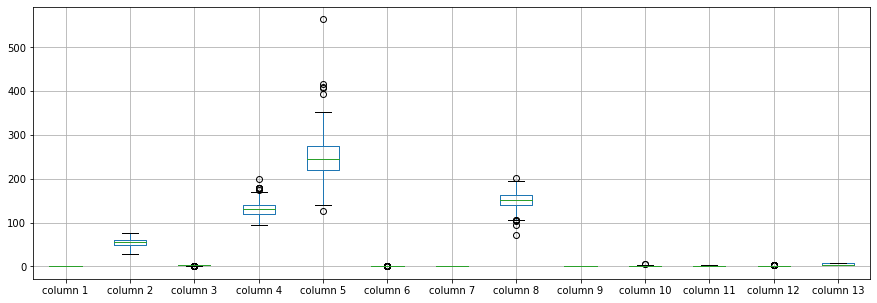

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.650538
column 2      54.485849
column 3       3.175781
column 4     132.000000
column 5     250.608491
column 6       0.154867
column 7       1.026316
column 8     149.690217
column 9       0.324561
column 10      0.995575
column 11      1.597826
column 12      0.665289
column 13      4.771930
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.160231,-0.015247,-0.077925,-0.290093,0.091711,0.108751,-0.107081,0.228782,0.159335,0.118144,0.147862,0.438827
column 2,-0.160231,1.000000,0.093385,0.288553,0.220767,0.123407,0.024625,-0.330210,0.065246,0.210104,0.131946,0.346663,0.170183
column 3,-0.015247,0.093385,1.000000,0.005039,0.062895,-0.078606,0.007532,-0.338603,0.337940,0.166457,0.094918,0.231694,0.285506
column 4,-0.077925,0.288553,0.005039,1.000000,0.157546,0.129383,0.038844,-0.046646,0.148315,0.125137,0.220270,0.131709,0.089931
column 5,-0.290093,0.220767,0.062895,0.157546,1.000000,0.037505,0.155228,0.002077,0.061536,0.069116,0.056321,0.068548,0.009092
column 6,0.091711,0.123407,-0.078606,0.129383,0.037505,1.000000,0.014940,-0.027773,0.001698,-0.074030,-0.104138,0.180471,0.075744
column 7,0.108751,0.024625,0.007532,0.038844,0.155228,0.014940,1.000000,-0.086678,0.014775,0.108778,0.234531,0.063671,0.019707
column 8,-0.107081,-0.330210,-0.338603,-0.046646,0.002077,-0.027773,-0.086678,1.000000,-0.458514,-0.385316,-0.404365,-0.144119,-0.275838
column 9,0.228782,0.065246,0.337940,0.148315,0.061536,0.001698,0.014775,-0.458514,1.000000,0.253038,0.285659,0.161212,0.311731
column 10,0.159335,0.210104,0.166457,0.125137,0.069116,-0.074030,0.108778,-0.385316,0.253038,1.000000,0.640094,0.189402,0.324289


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+120,13+120+120,13+120+120+120,13+120+120+120+120,13+120+120+120+120+120,13+120+120+120+120,13+120+120+120,13+120+120,13+120,13], vae_layer = False, seed = 120)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 465.60473251342773
Epoch: 1 , loss: 466.2563056945801
Epoch: 2 , loss: 463.8861446380615
Epoch: 3 , loss: 467.42975997924805
Epoch: 4 , loss: 464.24699783325195
Epoch: 5 , loss: 462.98884201049805
Epoch: 6 , loss: 463.15033531188965
Epoch: 7 , loss: 463.7606658935547
Epoch: 8 , loss: 466.50859451293945
Epoch: 9 , loss: 466.3828544616699
Epoch: 10 , loss: 462.4089527130127
Epoch: 11 , loss: 462.99698066711426
Epoch: 12 , loss: 461.04614639282227
Epoch: 13 , loss: 459.2308769226074
Epoch: 14 , loss: 463.5369358062744
Epoch: 15 , loss: 461.54047203063965
Epoch: 16 , loss: 457.0408763885498
Epoch: 17 , loss: 456.1323432922363
Epoch: 18 , loss: 456.6640968322754
Epoch: 19 , loss: 458.2814178466797
Epoch: 20 , loss: 454.17262268066406
Epoch: 21 , loss: 455.51538848876953
Epoch: 22 , loss: 453.96264266967773
Epoch: 23 , loss: 453.8736400604248
Epoch: 24 , loss: 450.54435539245605
Epoch: 25 , loss: 435.9445190

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6      -0.072667
column 7       2.000000
column 8     145.672470
column 9       0.000000
column 10      0.200000
column 11      1.629450
column 12      0.000000
column 13      4.115563
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-0.937270,0.000000,0.000000,-129.716536,0.000000,0.000000,0.000000,-108.789724,0.00000,0.000000,0.000000,0.0,-2.844581
1,0.000000,-44.502911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.307960,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,-0.023974,0.725998,0.000000,0.00000,1.157190,0.000000,0.0,0.000000
3,-0.979630,0.000000,0.000000,0.000000,0.000000,-0.004645,0.000000,-104.843356,0.00000,0.000000,-1.921609,0.0,-6.854486
4,0.586575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.344895,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.000000,-109.293186,-67.501465,0.000000,0.000000,0.000000,0.47465,0.000000,0.000000,0.0,0.000000
266,0.000000,0.000000,0.000000,-15.260185,0.000000,0.000000,0.000000,-58.441589,0.00000,0.000000,-0.130018,0.0,0.000000
267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
268,0.000000,0.000000,-0.902967,0.000000,21.764679,0.000000,0.000000,0.000000,0.00000,0.000000,-0.639772,0.0,-2.077239


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1304.3974389660964, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.24089696895820978

In [18]:
new_df.iloc[66,:]

column 1       0.424253
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8      82.953194
column 9       1.000000
column 10      0.000000
column 11      1.003703
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.062730,70.000000,4.000000,0.283464,322.000000,0.000000,2.000000,0.210276,0.00000,2.400000,2.000000,3.0,0.155419
1,0.000000,22.497089,3.000000,115.000000,564.000000,0.000000,2.000000,160.000000,0.00000,1.600000,0.692040,0.0,7.000000
2,1.000000,57.000000,2.000000,124.000000,261.000000,-0.023974,0.725998,141.000000,0.00000,1.457190,1.000000,0.0,7.000000
3,0.020370,64.000000,4.000000,128.000000,263.000000,-0.004645,0.000000,0.156644,1.00000,0.200000,0.078391,1.0,0.145514
4,0.586575,74.000000,2.000000,120.000000,269.000000,0.000000,2.000000,121.000000,1.00000,0.200000,1.344895,1.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,3.000000,62.706814,131.498535,1.000000,0.000000,162.000000,0.47465,0.500000,1.000000,0.0,7.000000
266,1.000000,44.000000,2.000000,104.739815,263.000000,0.000000,0.000000,114.558411,0.00000,0.000000,0.869982,0.0,7.000000
267,0.000000,56.000000,2.000000,140.000000,294.000000,0.000000,2.000000,153.000000,0.00000,1.300000,2.000000,0.0,3.000000
268,1.000000,57.000000,3.097033,140.000000,213.764679,0.000000,0.000000,148.000000,0.00000,0.400000,1.360228,0.0,3.922761


In [20]:
imputations[-1].to_excel("Sheart_NL_20(imp).xlsx", index=False, header=False)